In [9]:
import pandas as pd
data = pd.read_csv("test.csv")
data

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...,...
24754,61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
24755,61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
24756,61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83
24757,61894,7.2315,8.0,7.508403,1.018692,1388.0,2.601202,33.67,-117.98


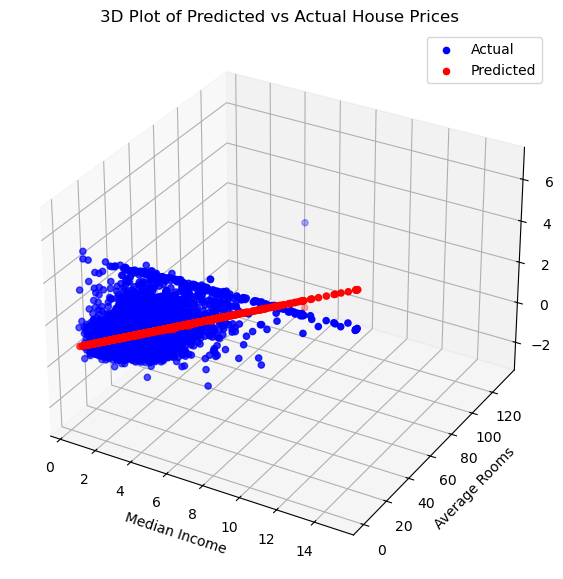

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing  # Fixed typo in sklearn.datasets
from mpl_toolkits.mplot3d import Axes3D  # Added for 3D plotting

# Load the California housing dataset
california_housing = fetch_california_housing()

# Assign the data (features) and target (housing prices)
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

# Select specific features for analysis
X = X[['MedInc', 'AveRooms']]  # Fixed incorrect feature name 'Medlnc' to 'MedInc'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual test data points
ax.scatter(X_test['MedInc'], X_test['AveRooms'], y_test, color='blue', label='Actual')

# Plot the predicted values
ax.scatter(X_test['MedInc'], X_test['AveRooms'], y_pred, color='red', label='Predicted')

# Label axes
ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Value')

# Add legend and title
ax.legend()
plt.title('3D Plot of Predicted vs Actual House Prices')
plt.show()
